In [105]:
import os
import cv2
import numpy as np
from PIL import Image as ImagePIL
from matplotlib import pyplot as plt

In [106]:
img_dir = '/Users/ryan/OneDrive - The University of Nottingham Ningbo China/Y2/OCR Summer research/Python_Algorithm/OCR Dataset'
result_dir = '/Users/ryan/OneDrive - The University of Nottingham Ningbo China/Y2/OCR Summer research/Python_Algorithm/Result' 
img_name = sorted(os.listdir(img_dir))[2:]

In [107]:
def deskew(im, max_skew=10):
    height, width = im.shape

    # Create a grayscale image and denoise it
    #im_gs = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gs = im
    im_gs = cv2.fastNlMeansDenoising(im_gs, h=3)

    # Create an inverted B&W copy using Otsu (automatic) thresholding
    im_bw = cv2.threshold(im_gs, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Detect lines in this image. Parameters here mostly arrived at by trial and error.
    lines = cv2.HoughLinesP(
        im_bw, 1, np.pi / 180, 200, minLineLength=width / 12, maxLineGap=width / 150
    )

    # Collect the angles of these lines (in radians)
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angles.append(np.arctan2(y2 - y1, x2 - x1))

    # If the majority of our lines are vertical, this is probably a landscape image
    landscape = np.sum([abs(angle) > np.pi / 4 for angle in angles]) > len(angles) / 2

    # Filter the angles to remove outliers based on max_skew
    if landscape:
        angles = [
            angle
            for angle in angles
            if np.deg2rad(90 - max_skew) < abs(angle) < np.deg2rad(90 + max_skew)
        ]
    else:
        angles = [angle for angle in angles if abs(angle) < np.deg2rad(max_skew)]

    if len(angles) < 5:
        # Insufficient data to deskew
        return im

    # Average the angles to a degree offset
    angle_deg = np.rad2deg(np.median(angles))

    # If this is landscape image, rotate the entire canvas appropriately
    if landscape:
        if angle_deg < 0:
            im = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
            angle_deg += 90
        elif angle_deg > 0:
            im = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
            angle_deg -= 90

    # Rotate the image by the residual offset
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle_deg, 1)
    im = cv2.warpAffine(im, M, (width, height), borderMode=cv2.BORDER_REPLICATE)
    return im

In [123]:
def cv_process(path):
    img = cv2.imread(path)

    #Increase contrast

    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l_channel)

    limg = cv2.merge((cl,a,b))

    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    #Opencv denoise

    dn = cv2.fastNlMeansDenoisingColored(enhanced_img,None,10,10,7,21)
    
    cv2.imwrite('temp.jpg', dn)

    temp = cv2.imread('temp.jpg',0)

    dn = cv2.medianBlur(temp,1)
    
    dn= cv2.adaptiveThreshold(dn,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    
    result = deskew(dn)
    
    cv2.imwrite('Clean_'+f, result)

    a = 1

    return a 

In [125]:
os.chdir(result_dir) 

for f in img_name:
      cv_process( img_dir + '/'+ f)

In [84]:
#Test Code

path = img_dir + '/' +'IMG_0834.JPG'
img = cv2.imread(path)
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

limg = cv2.merge((cl,a,b))

enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

dn = cv2.fastNlMeansDenoisingColored(enhanced_img,None,10,10,7,21)

temp = cv2.imwrite('temp.jpg', dn)

temp = cv2.imread('temp.jpg',0)

dn = cv2.medianBlur(temp,1)

dn= cv2.adaptiveThreshold(dn,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
         cv2.THRESH_BINARY,11,2)

result = deskew(dn)
cv2.imwrite('Clean.jpg',result)

True

In [121]:
os.chdir(result_dir) 
temp = cv2.imread('temp.jpg',0)
dn = cv2.medianBlur(temp,1)
dn= cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

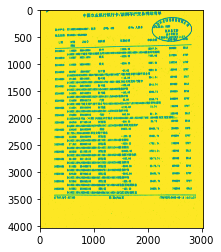

In [122]:
plt.imshow(dn)

In [5]:
a = 'img.JPG'

In [9]:
a.index('.')

3

In [10]:
a[0:3]

'img'